In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_qsphere
#from qiskit.circuit.library.standard_gates import HGate
import numpy as np
%matplotlib inline

In [2]:
#BIT-FLIP

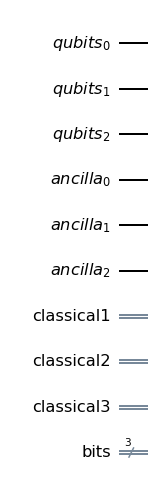

In [47]:
qubits = QuantumRegister(3, name='qubits')
ancilla = QuantumRegister(3, name='ancilla')
classical1 = ClassicalRegister(1, name='classical1')
classical2 = ClassicalRegister(1, name='classical2')
classical3 = ClassicalRegister(1, name='classical3')
bits = ClassicalRegister(3, name='bits')

qc = QuantumCircuit(qubits, ancilla, classical1, classical2, classical3, bits)

qc.draw('mpl')

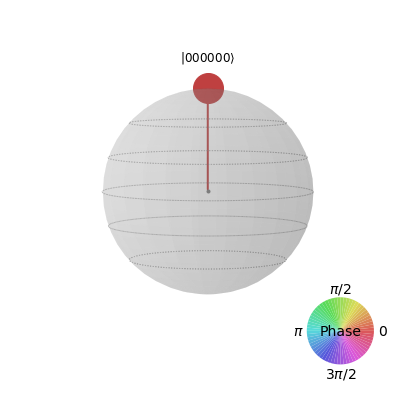

In [48]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

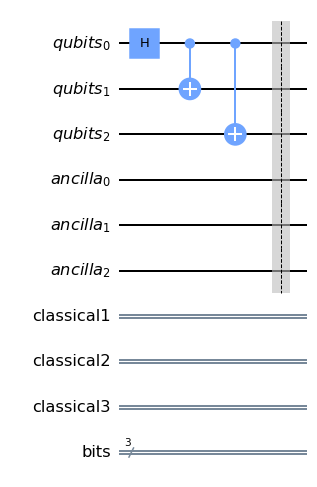

In [49]:
qc.h(qubits[0])
i = 1
while (i < 3):
    qc.cx(qubits[0],qubits[i])
    i = i + 1
qc.barrier()
qc.draw('mpl')

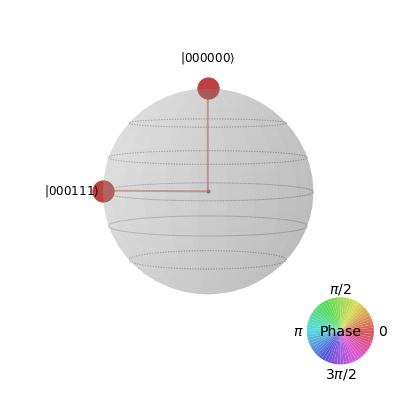

In [50]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

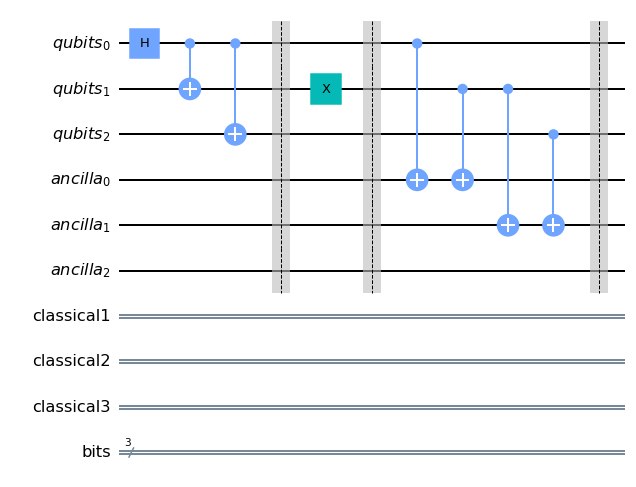

In [51]:
qc.x(qubits[1])
qc.barrier()
i = 0
while (i < 2):
    qc.cx(qubits[i],ancilla[0])
    i = i + 1
i = 1
while (i < 3):
    qc.cx(qubits[i],ancilla[1])
    i = i + 1
qc.barrier()
qc.draw('mpl')

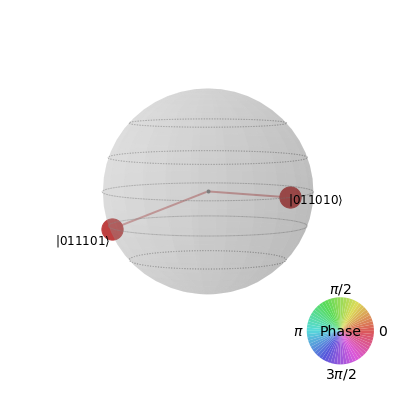

In [52]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

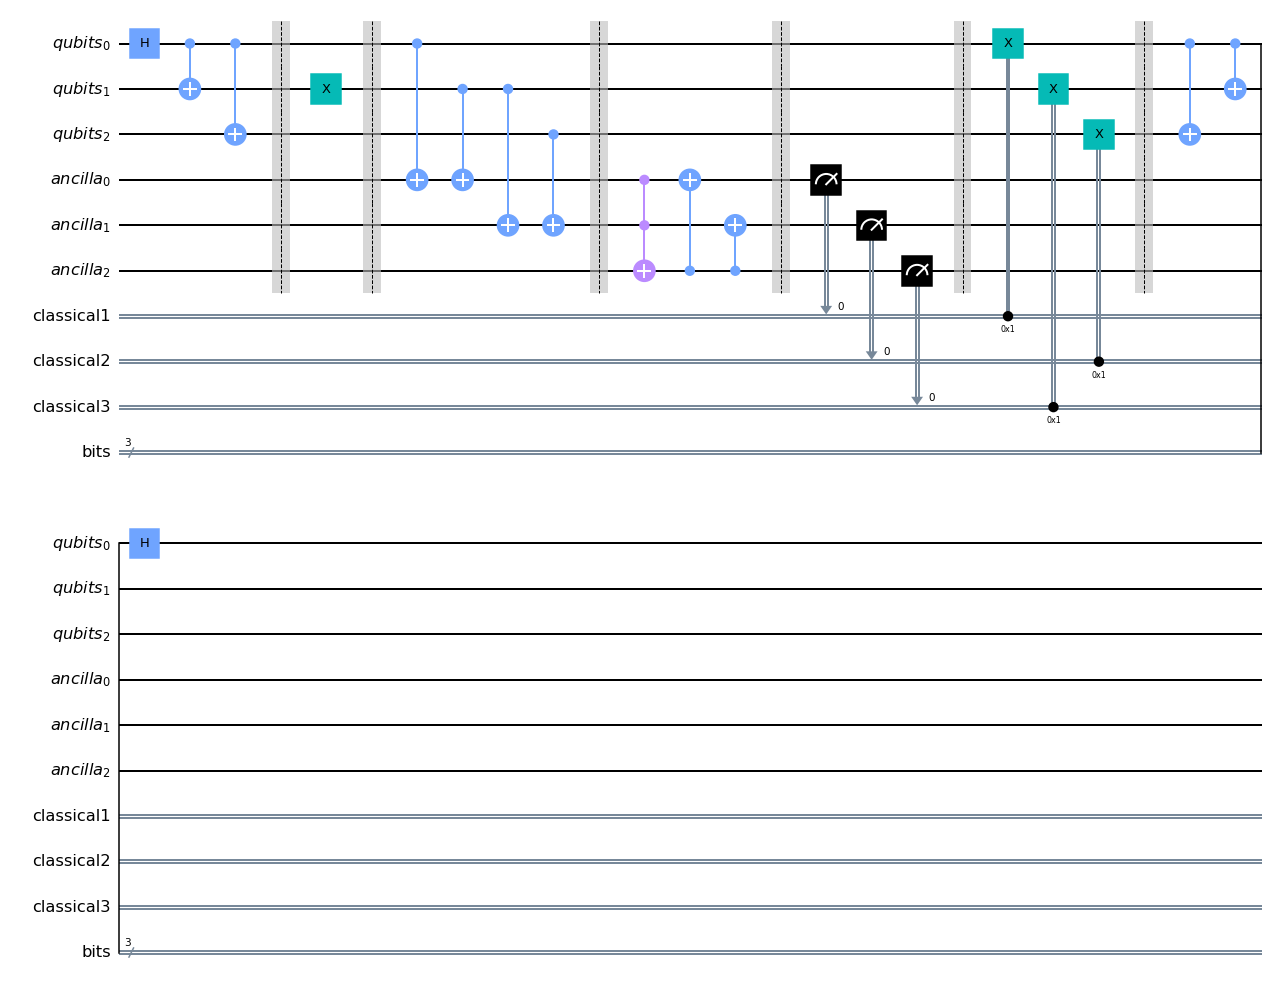

In [53]:
#qc.h(ancilla)
qc.mct([ancilla[0],ancilla[1]],ancilla[2])
qc.cx(ancilla[2],[ancilla[0],ancilla[1]])
qc.barrier()
qc.measure(ancilla[0],classical1)
qc.measure(ancilla[1],classical2)
qc.measure(ancilla[2],classical3)
qc.barrier()
#qc.cx(ancilla[0],qubits[0])
#qc.cx(ancilla[1],qubits[2])
#qc.cx(ancilla[2],qubits[1])
qc.x(qubits[0]).c_if(classical1,1)
qc.x(qubits[1]).c_if(classical3,1)
qc.x(qubits[2]).c_if(classical2,1)
qc.barrier()
qc.cx(qubits[0],qubits[2])
qc.cx(qubits[0],qubits[1])
qc.h(qubits[0])
qc.draw('mpl')

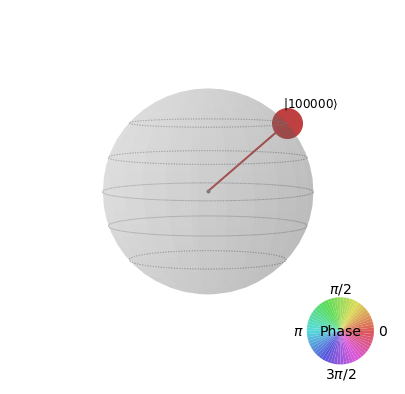

In [54]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

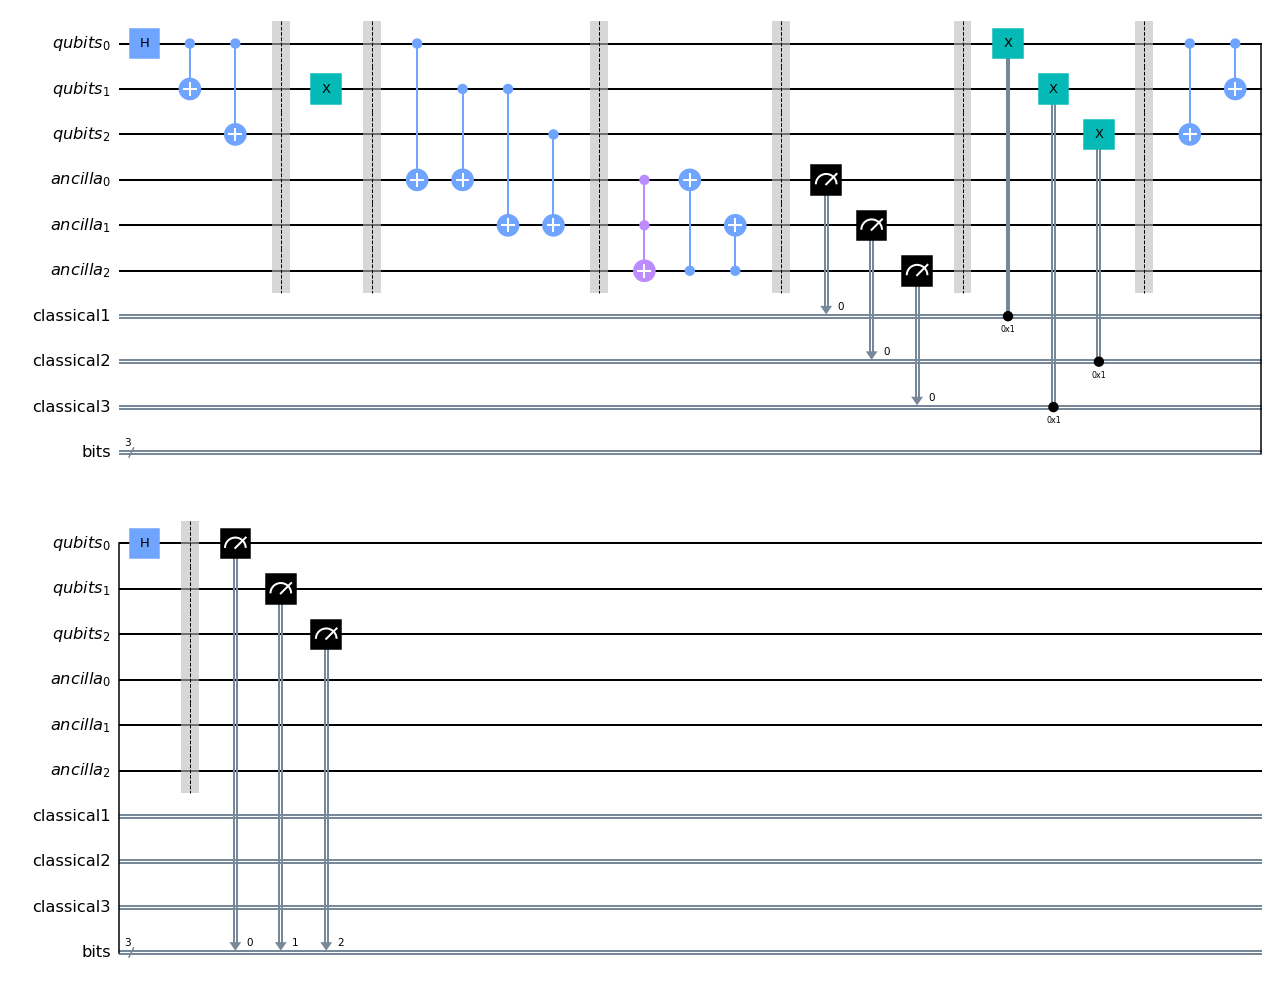

In [55]:
qc.barrier()
qc.measure(qubits,bits)
qc.draw('mpl')

In [56]:
#print(qc.draw('latex_source'))

In [57]:
qc = qc.reverse_bits()

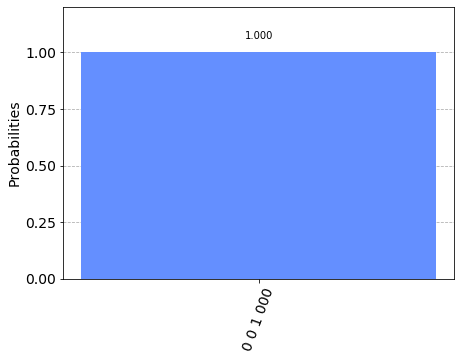

In [58]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)
results = job.result().get_counts()
plot_histogram(results)

In [19]:
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-research-2',group='federal-uni-espr-1',project='main')
#lagos = provider.get_backend('ibm_lagos')

C:\Users\josev\anaconda3\lib\site-packages\qiskit\aqua\operators\operator_globals.py:48: DeprecationWarning: `from_label` is deprecated and will be removed no earlier than 3 months after the release date. Use Pauli(label) instead.
  X = make_immutable(PrimitiveOp(Pauli.from_label('X')))
C:\Users\josev\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [44]:
#job = execute(qc, initial_layout=[5,6,3,4,1,2], backend=lagos, shots=8192)

In [45]:
#lagos_id = job.job_id()

In [46]:
#print(lagos_id)

6140806a6feb7eca1f6f4f7b


In [ ]:
#result_lagos = lagos.retrieve_job('61407f3ef020e8eef06ba87c').result()
#counts_lagos = result_lagos.get_counts()
#plot_histogram(counts_lagos)

In [ ]:
#print(counts_lagos)

In [45]:
#PHASE-FLIP

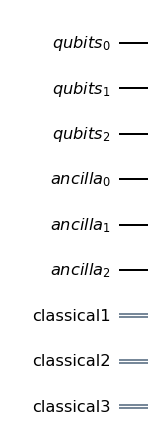

In [20]:
qubits = QuantumRegister(3, name='qubits')
ancilla = QuantumRegister(3, name='ancilla')
classical1 = ClassicalRegister(1, name='classical1')
classical2 = ClassicalRegister(1, name='classical2')
classical3 = ClassicalRegister(1, name='classical3')

qc = QuantumCircuit(qubits, ancilla, classical1, classical2, classical3)

qc.draw('mpl')

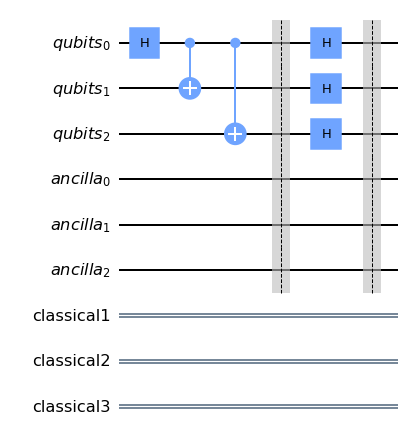

In [21]:
qc.h(qubits[0])
i = 1
#controlled_hadamard = HGate().control(1)
while (i < 3):
    qc.cx(qubits[0],qubits[i])
    #qc.append(controlled_hadamard, [qubits[0], qubits[i]])
    i = i + 1
qc.barrier()
qc.h(qubits)
qc.barrier()
qc.draw('mpl')

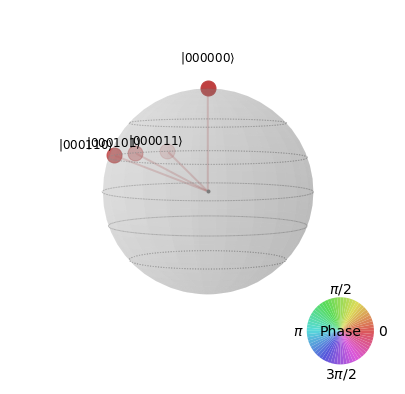

In [45]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

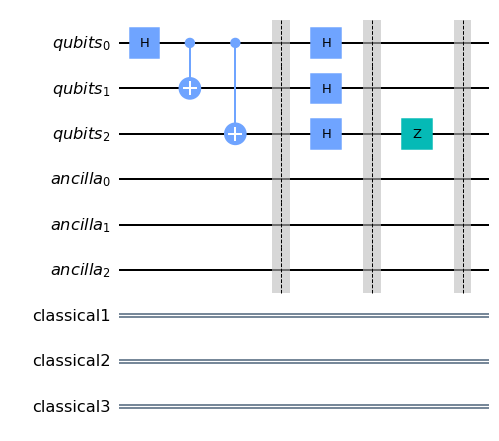

In [22]:
qc.z(qubits[2])
qc.barrier()
qc.draw('mpl')

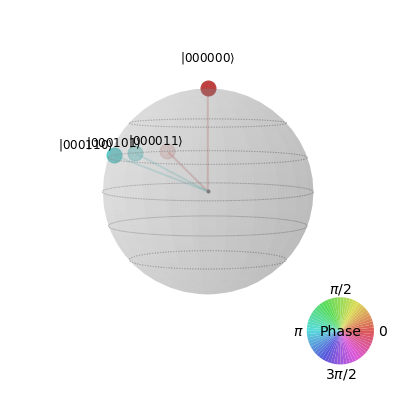

In [47]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

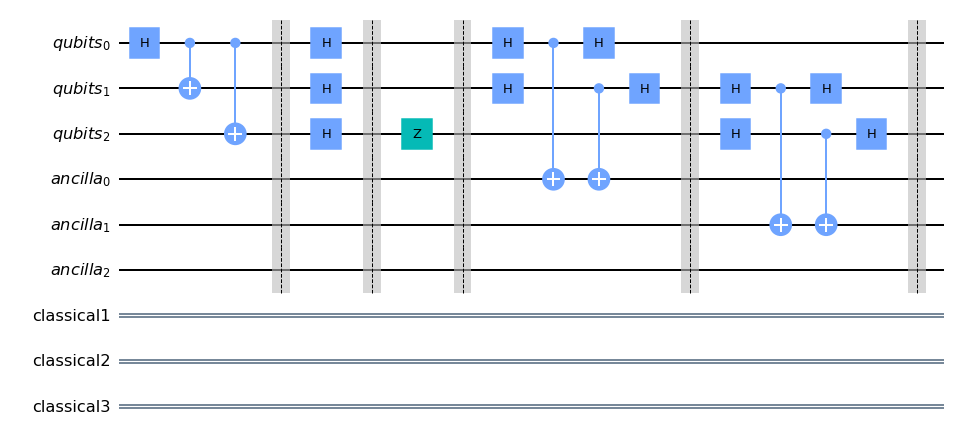

In [23]:
i = 0
while (i < 2):
    qc.h(qubits[i])
    #qc.h(ancilla[0])
    qc.cx(qubits[i],ancilla[0])
    #qc.h(ancilla[0])
    qc.h(qubits[i])
    i = i + 1
i = 1
qc.barrier()
while (i < 3):
    qc.h(qubits[i])
    #qc.h(ancilla[1])
    qc.cx(qubits[i],ancilla[1])
    #qc.h(ancilla[1])
    qc.h(qubits[i])
    i = i + 1
qc.barrier()
qc.draw('mpl')

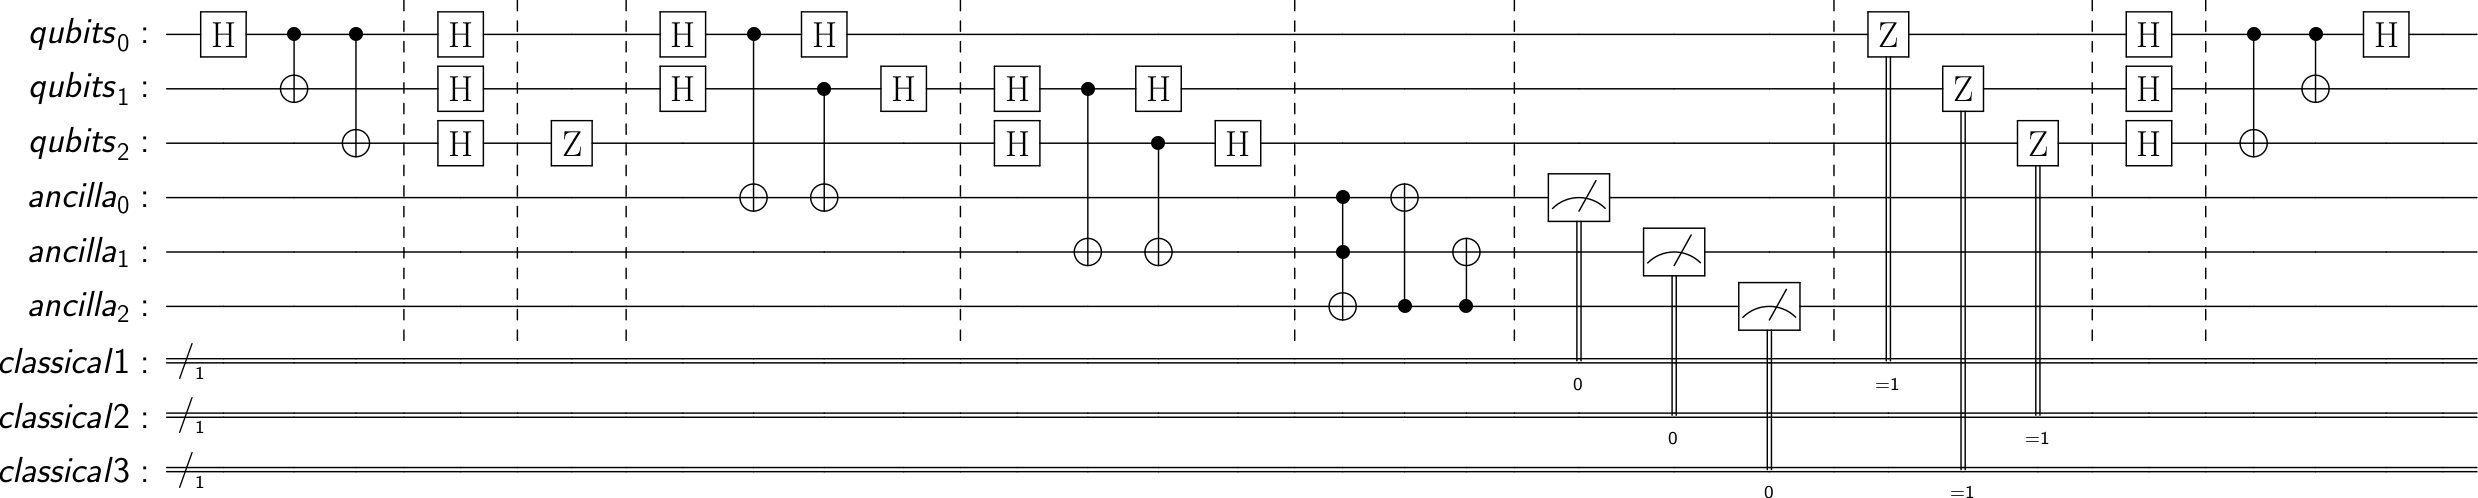

In [24]:
#qc.h(ancilla)
qc.mct([ancilla[0],ancilla[1]],ancilla[2])
qc.cx(ancilla[2],[ancilla[0],ancilla[1]])
qc.barrier()
qc.measure(ancilla[0],classical1)
qc.measure(ancilla[1],classical2)
qc.measure(ancilla[2],classical3)
qc.barrier()
qc.z(qubits[0]).c_if(classical1,1)
qc.z(qubits[1]).c_if(classical3,1)
qc.z(qubits[2]).c_if(classical2,1)
qc.barrier()
qc.h(qubits)
qc.barrier()
qc.cx(qubits[0],qubits[2])
qc.cx(qubits[0],qubits[1])
qc.h(qubits[0])
qc.draw('latex')

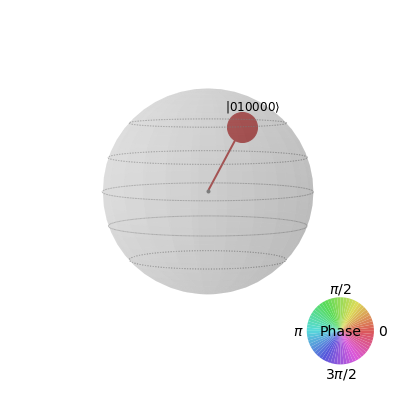

In [50]:
backend = Aer.get_backend('statevector_simulator')
state_vector = execute(qc, backend = backend).result().get_statevector()
plot_state_qsphere(state_vector)

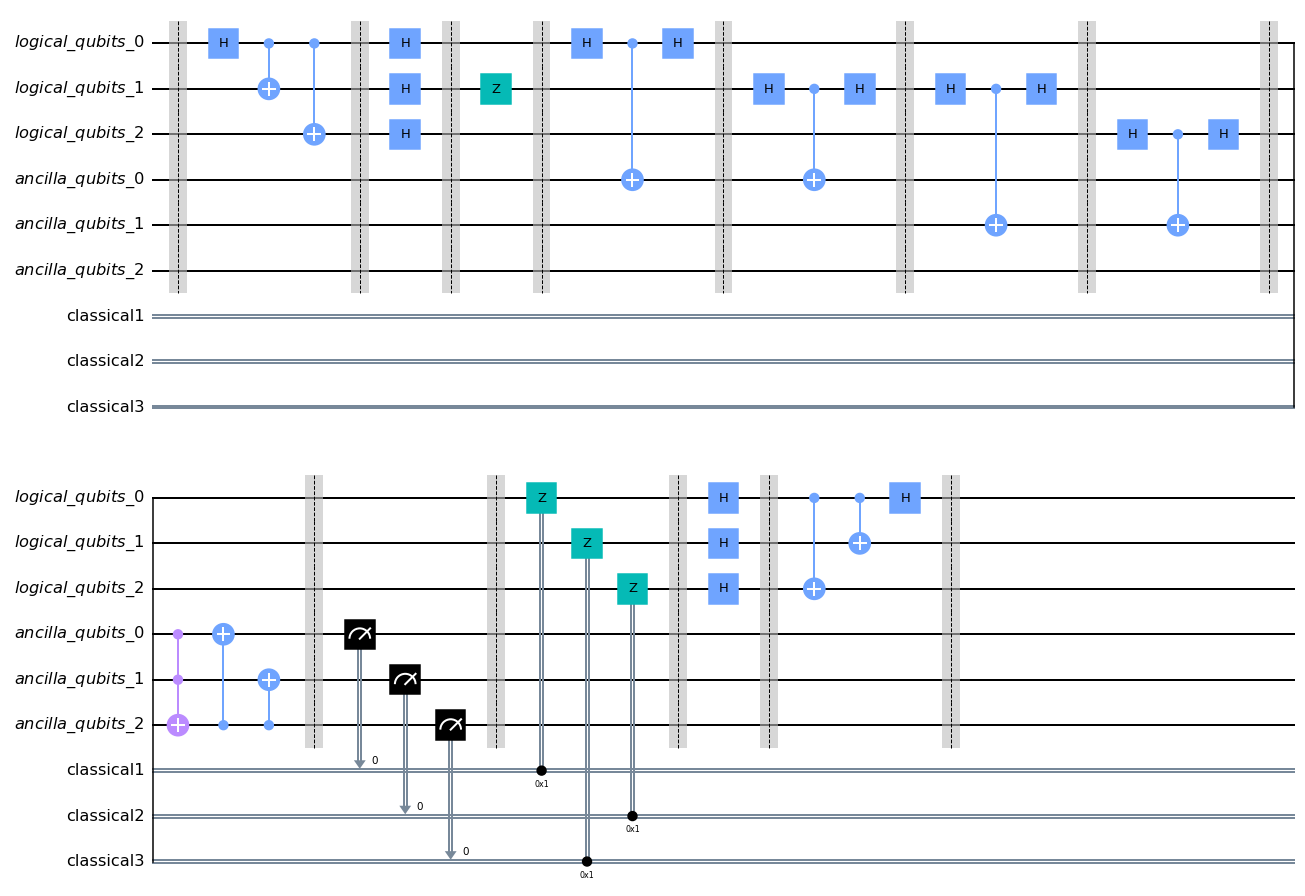

In [41]:
qc.barrier()
#qc.measure(qubits[0], classical3)
qc.draw('mpl')

In [130]:
print(qc.draw('latex_source'))

% \documentclass[preview]{standalone}
% If the image is too large to fit on this documentclass use
\documentclass[draft]{beamer}
% img_width = 8, img_depth = 43
\usepackage[size=custom,height=12,width=76,scale=0.7]{beamerposter}
% instead and customize the height and width (in cm) to fit.
% Large images may run out of memory quickly.
% To fix this use the LuaLaTeX compiler, which dynamically
% allocates memory.
\usepackage[braket, qm]{qcircuit}
\usepackage{amsmath}
\pdfmapfile{+sansmathaccent.map}
% \usepackage[landscape]{geometry}
% Comment out the above line if using the beamer documentclass.
\begin{document}

\begin{equation*}
    \Qcircuit @C=1.0em @R=0.0em @!R {
	 	\lstick{ {logical_qubits}_{0} :  } & \qw \barrier[0em]{4} & \qw & \gate{H} & \ctrl{1} & \ctrl{2} \barrier[0em]{4} & \qw & \gate{H} \barrier[0em]{4} & \qw & \qw \barrier[0em]{4} & \qw & \gate{H} & \ctrl{3} & \gate{H} \barrier[0em]{4} & \qw & \qw & \qw & \qw \barrier[0em]{4} & \qw & \qw & \qw & \qw \barrier[0em]{4} & \qw 

In [25]:
qc = qc.reverse_bits()

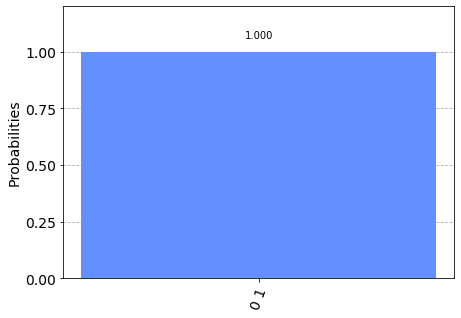

In [26]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1024)
results = job.result().get_counts()
plot_histogram(results)

In [2]:
#SHOR CODE

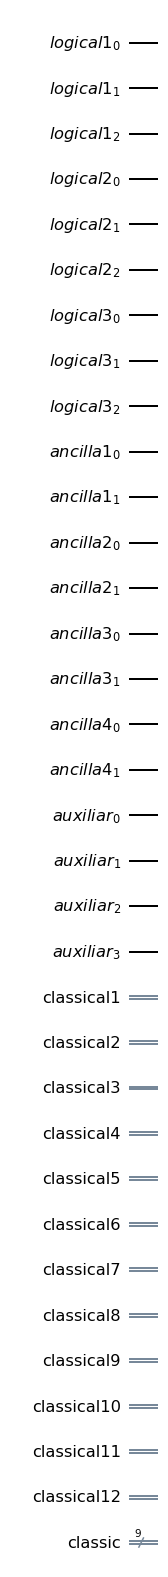

In [37]:
qubits1 = QuantumRegister(3, name='logical1')
qubits2 = QuantumRegister(3, name='logical2')
qubits3 = QuantumRegister(3, name='logical3')
ancilla1 = QuantumRegister(2, name='ancilla1')
ancilla2 = QuantumRegister(2, name='ancilla2')
ancilla3 = QuantumRegister(2, name='ancilla3')
ancilla4 = QuantumRegister(2, name='ancilla4')
aux = QuantumRegister(4, name='auxiliar')
classical1 = ClassicalRegister(1, name='classical1')
classical2 = ClassicalRegister(1, name='classical2')
classical3 = ClassicalRegister(1, name='classical3')
classical4 = ClassicalRegister(1, name='classical4')
classical5 = ClassicalRegister(1, name='classical5')
classical6 = ClassicalRegister(1, name='classical6')
classical7 = ClassicalRegister(1, name='classical7')
classical8 = ClassicalRegister(1, name='classical8')
classical9 = ClassicalRegister(1, name='classical9')
classical10 = ClassicalRegister(1, name='classical10')
classical11 = ClassicalRegister(1, name='classical11')
classical12 = ClassicalRegister(1, name='classical12')
classic = ClassicalRegister(9, name='classic')

qc = QuantumCircuit(qubits1, qubits2, qubits3, ancilla1, ancilla2, ancilla3, ancilla4, aux, classical1, classical2, classical3, classical4, classical5, classical6, classical7, classical8, classical9, classical10, classical11, classical12, classic)

qc.draw('mpl')

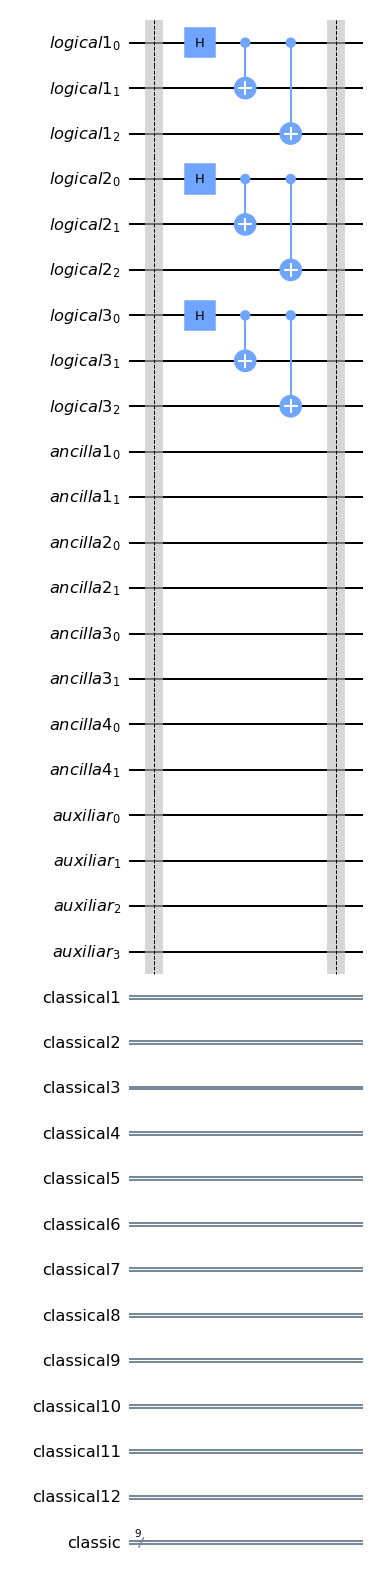

In [38]:
qc.barrier()
#qc.x(qubits1[0])
#qc.x(qubits2[0])
#qc.x(qubits3[0])
qc.h(qubits1[0])
qc.h(qubits2[0])
qc.h(qubits3[0])
i = 1
while (i < 3):
    qc.cx(qubits1[0], qubits1[i])
    qc.cx(qubits2[0], qubits2[i])
    qc.cx(qubits3[0], qubits3[i])
    i = i+1
qc.barrier()
qc.draw('mpl')

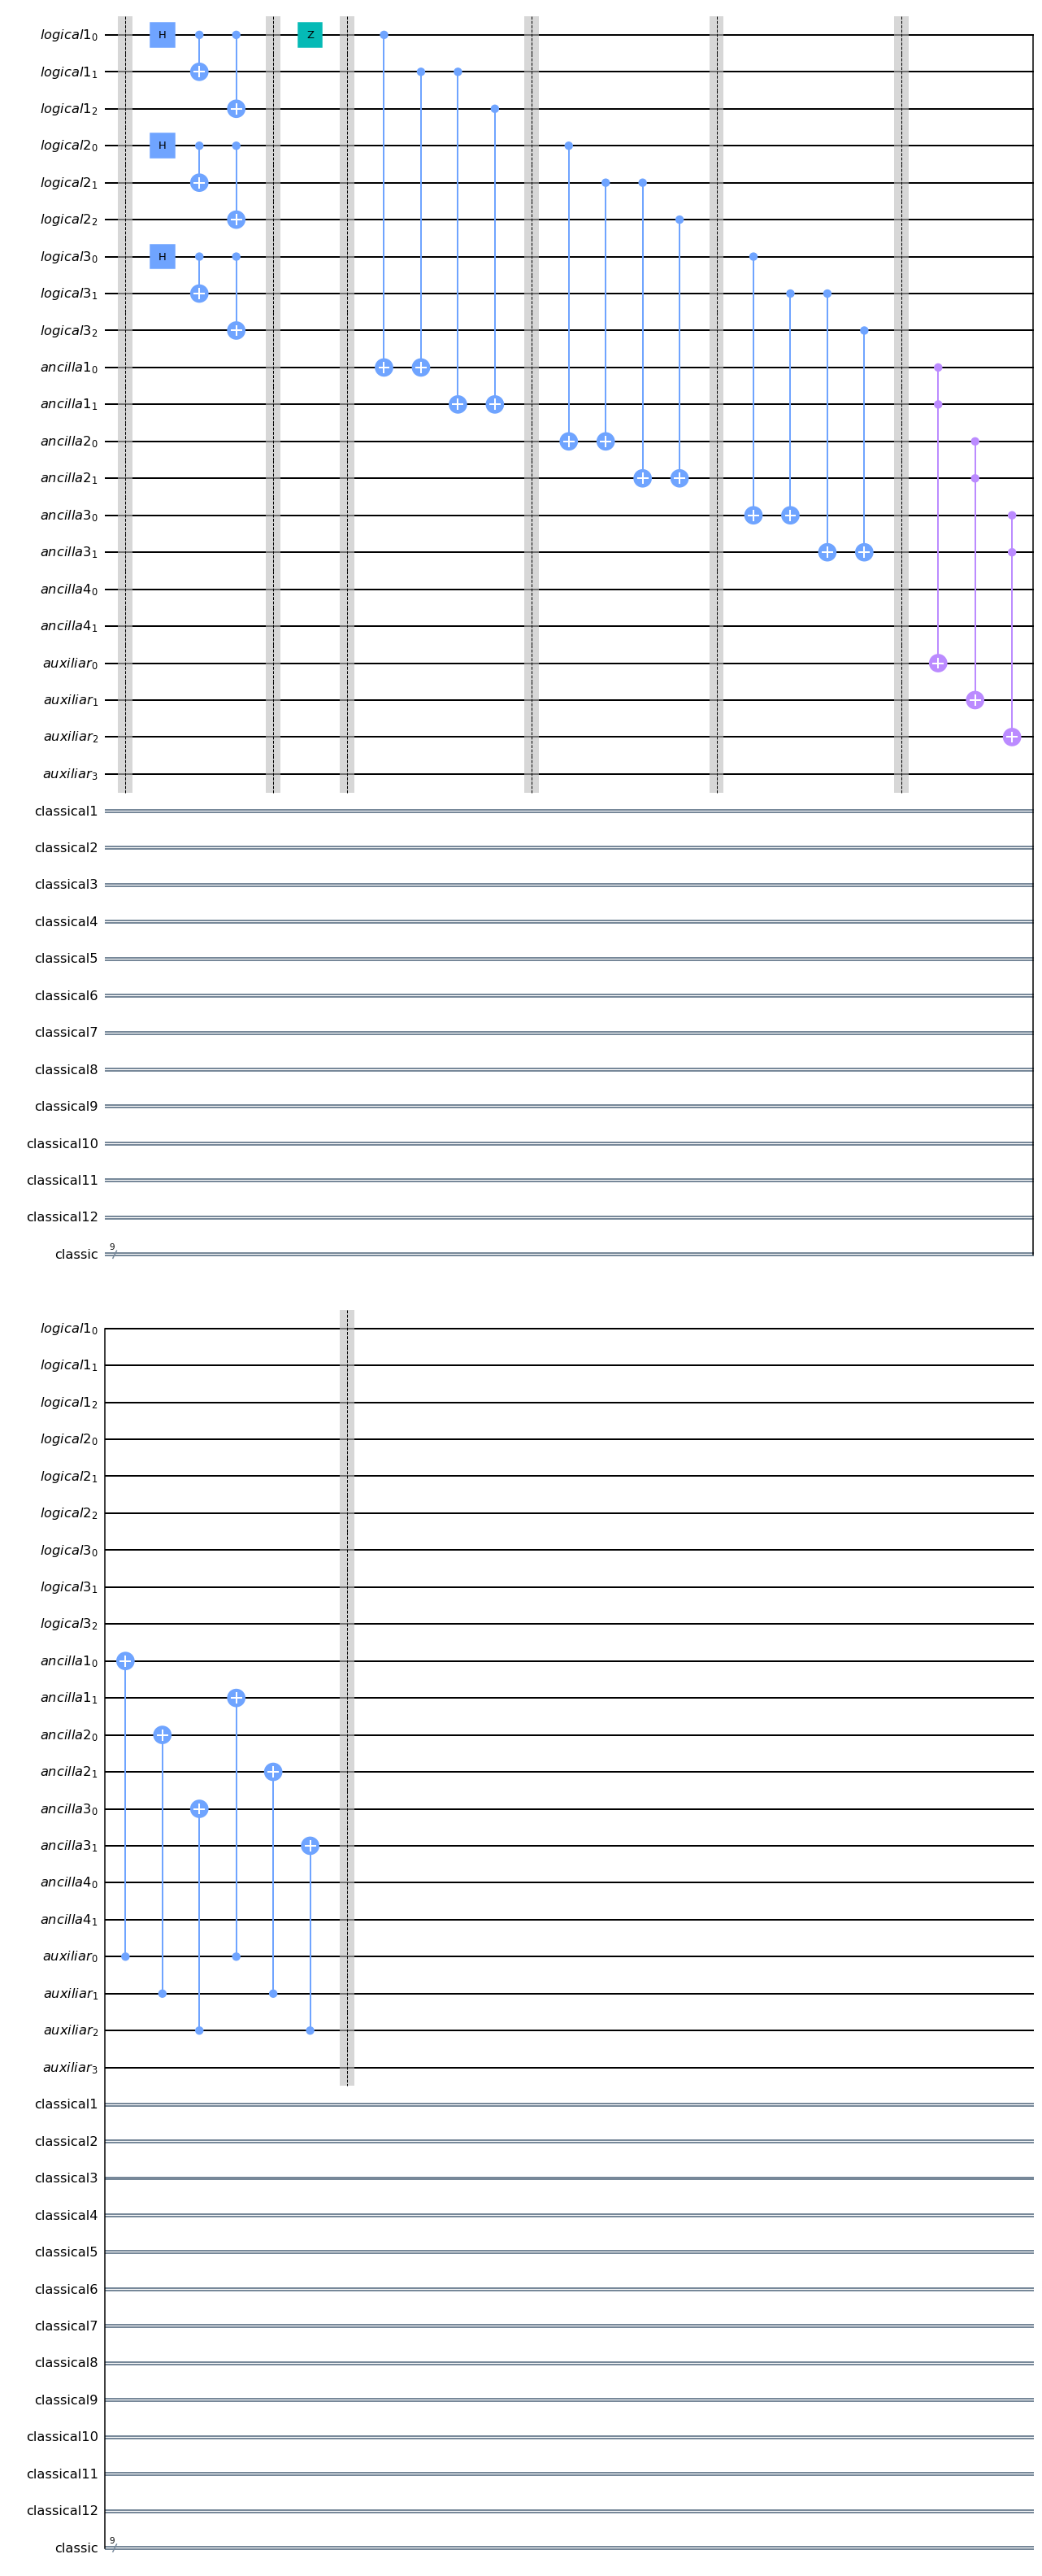

In [39]:
#space for introduction of errors
qc.z(qubits1[0])
qc.barrier()
i = 0
while (i < 2):
    qc.cx(qubits1[i],ancilla1[0])
    i = i + 1
i = 1
while (i < 3):
    qc.cx(qubits1[i],ancilla1[1])
    i = i + 1
qc.barrier()
i = 0
while (i < 2):
    qc.cx(qubits2[i],ancilla2[0])
    i = i + 1
i = 1
while (i < 3):
    qc.cx(qubits2[i],ancilla2[1])
    i = i + 1
qc.barrier()
i = 0
while (i < 2):
    qc.cx(qubits3[i],ancilla3[0])
    i = i + 1
i = 1
while (i < 3):
    qc.cx(qubits3[i],ancilla3[1])
    i = i + 1
qc.barrier()
qc.mct(ancilla1,aux[0])
qc.cx(aux[0],[ancilla1[0],ancilla1[1]])
qc.mct(ancilla2,aux[1])
qc.cx(aux[1],[ancilla2[0],ancilla2[1]])
qc.mct(ancilla3,aux[2])
qc.cx(aux[2],[ancilla3[0],ancilla3[1]])
qc.barrier()
qc.draw('mpl')

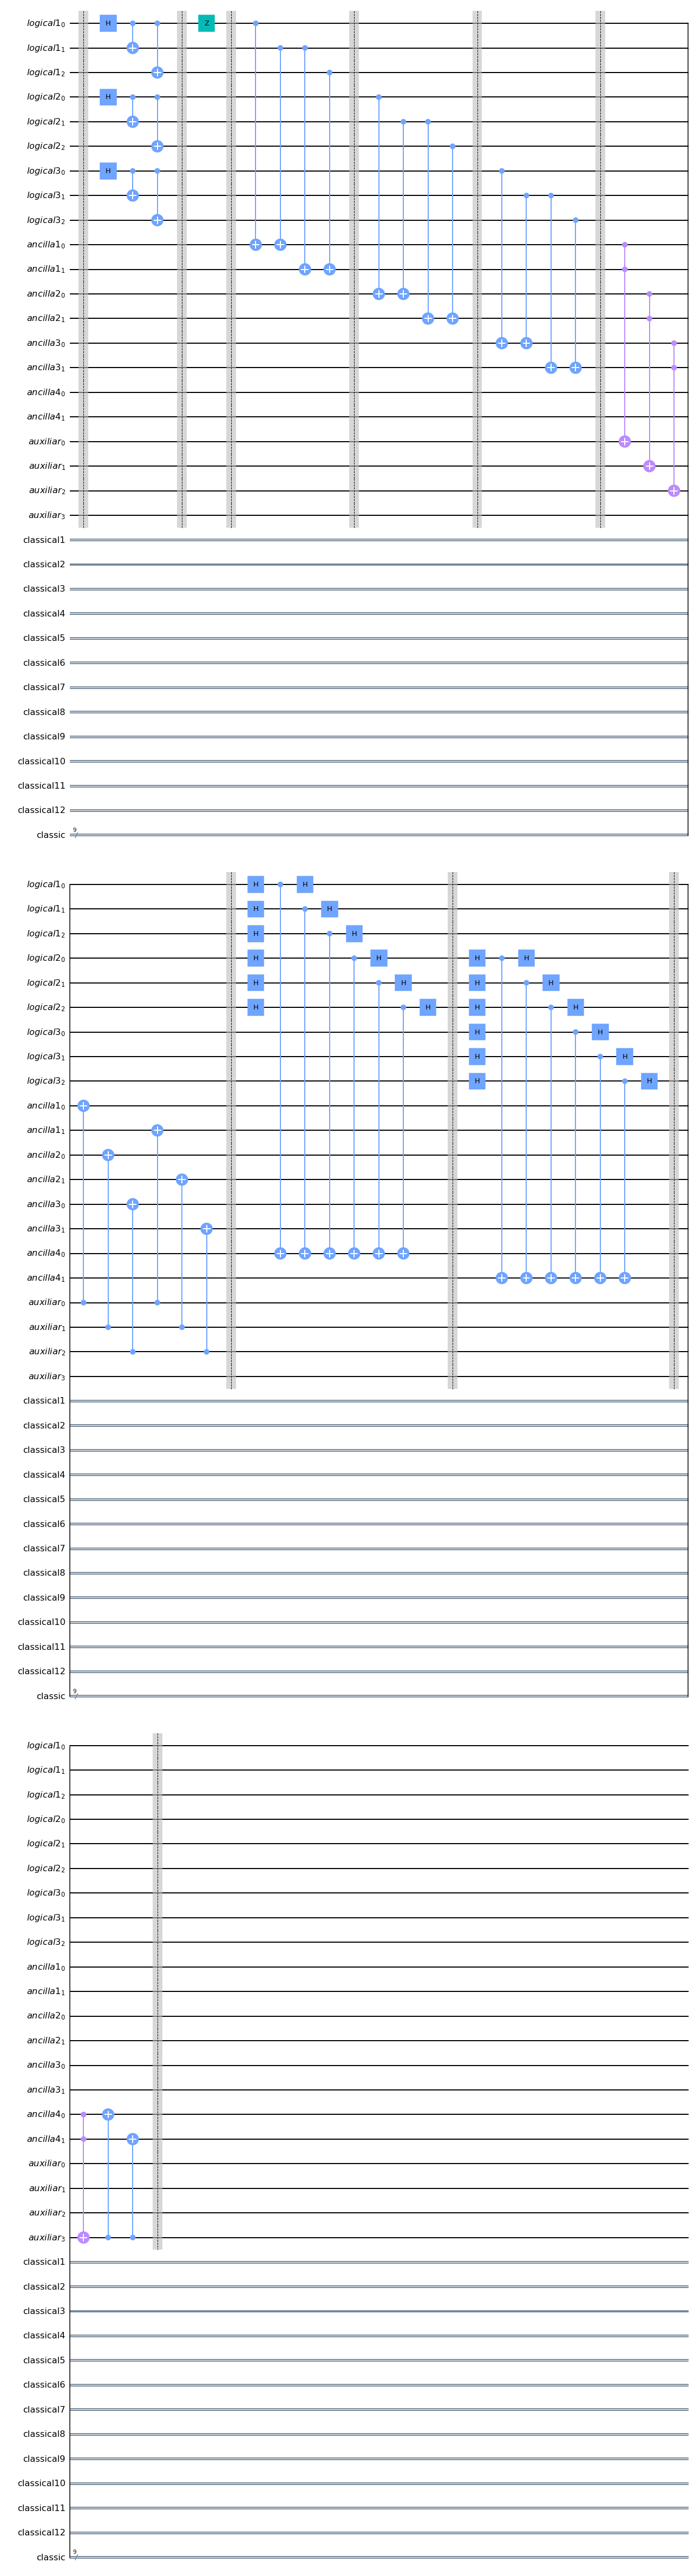

In [40]:
qc.h(qubits1)
qc.h(qubits2)
#qc.h(ancilla4[0])
qc.cx(qubits1[0],ancilla4[0])
qc.cx(qubits1[1],ancilla4[0])
qc.cx(qubits1[2],ancilla4[0])
qc.cx(qubits2[0],ancilla4[0])
qc.cx(qubits2[1],ancilla4[0])
qc.cx(qubits2[2],ancilla4[0])
#qc.h(ancilla4[0])
qc.h(qubits2)
qc.h(qubits1)
qc.barrier()

qc.h(qubits2)
qc.h(qubits3)
#qc.h(ancilla4[1])
qc.cx(qubits2[0],ancilla4[1])
qc.cx(qubits2[1],ancilla4[1])
qc.cx(qubits2[2],ancilla4[1])
qc.cx(qubits3[0],ancilla4[1])
qc.cx(qubits3[1],ancilla4[1])
qc.cx(qubits3[2],ancilla4[1])
#qc.h(ancilla4[1])
qc.h(qubits3)
qc.h(qubits2)
qc.barrier()
#qc.h(ancilla4)
qc.mct(ancilla4[:],aux[3])
#qc.h(ancilla4)
#qc.h(ancilla4[0])
qc.cx(aux[3],ancilla4[0])
#qc.h(ancilla4[0])
#qc.h(ancilla4[1])
qc.cx(aux[3],ancilla4[1])
#qc.h(ancilla4[1])
qc.barrier()
    
    
qc.draw('mpl')

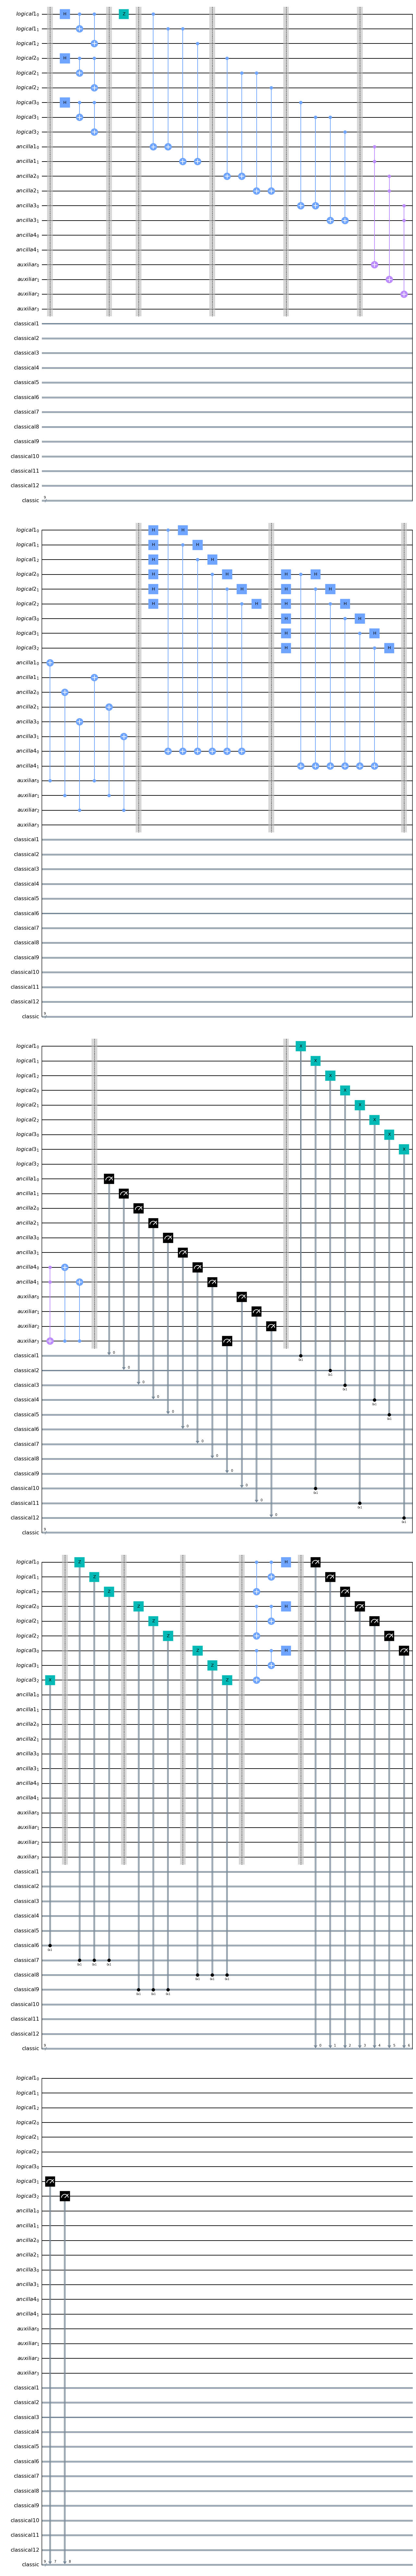

In [41]:
#qc.h(ancilla1)
#qc.h(ancilla2)
#qc.h(ancilla3)
#qc.h(ancilla4)
qc.measure(ancilla1[0],classical1)
qc.measure(ancilla1[1],classical2)
qc.measure(ancilla2[0],classical3)
qc.measure(ancilla2[1],classical4)
qc.measure(ancilla3[0],classical5)
qc.measure(ancilla3[1],classical6)
qc.measure(ancilla4[0],classical7)
qc.measure(ancilla4[1],classical8)
qc.measure(aux[3],classical9)
qc.measure(aux[0],classical10)
qc.measure(aux[1],classical11)
qc.measure(aux[2],classical12)
qc.barrier()
qc.x(qubits1[0]).c_if(classical1,1)
qc.x(qubits1[1]).c_if(classical10,1)
qc.x(qubits1[2]).c_if(classical2,1)
qc.x(qubits2[0]).c_if(classical3,1)
qc.x(qubits2[1]).c_if(classical11,1)
qc.x(qubits2[2]).c_if(classical4,1)
qc.x(qubits3[0]).c_if(classical5,1)
qc.x(qubits3[1]).c_if(classical12,1)
qc.x(qubits3[2]).c_if(classical6,1)
qc.barrier()
qc.z(qubits1).c_if(classical7,1)
qc.barrier()
qc.z(qubits2).c_if(classical9,1)
qc.barrier()
qc.z(qubits3).c_if(classical8,1)
qc.barrier()
i = 2
while (i >= 1):
    qc.cx(qubits1[0], qubits1[i])
    qc.cx(qubits2[0], qubits2[i])
    qc.cx(qubits3[0], qubits3[i])
    i = i-1
qc.h(qubits1[0])
qc.h(qubits2[0])
qc.h(qubits3[0])
#qc.x(qubits1[0])
#qc.x(qubits2[0])
#qc.x(qubits3[0])
qc.barrier()
qc.measure(qubits1,[classic[0],classic[1],classic[2]])
qc.measure(qubits2,[classic[3],classic[4],classic[5]])
qc.measure(qubits3,[classic[6],classic[7],classic[8]])
qc.draw('mpl')

In [42]:
qc = qc.reverse_bits()

In [43]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend = backend, shots = 1)
results = job.result().get_counts()
print(results)

{'0 0 0 0 0 0 1 0 0 0 0 0 000000000': 1}
